# **0. Install Depedencies**

In [1]:
!pip install transformers==3.1.0

     |████████████████████████████████| 890kB 8.9MB/s 
     |████████████████████████████████| 3.0MB 52.6MB/s 
     |████████████████████████████████| 901kB 49.9MB/s 
     |████████████████████████████████| 1.2MB 39.5MB/s 


# **1. Import Libraries**


In [2]:
#Import libraries
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

import tensorflow as tf

In [3]:
#Some libraries from APLOD-Net V1.0
#from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

# **2. EDA (Exploratory Data Analysis)**

In [ ]:
df = pd.read_csv('/Dataset Twitter 2 - Indonesian Sentiment Twitter Dataset Labeled.csv')
df

,sentimen,Tweet
0,0,barusan liat tulisan di belakang truk rela inj...
1,0,her itu lho miss kevin sama keven rebutan gimb...
2,0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0,aku mohon tepatilah janjimu penantiancintaeps19
4,0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
13248,"6,""Ahok protes, dasar Ahok plat aja diributin!...",NaN
13249,6,cina ngeselin banget
13250,6,dasar cina
13251,2,kepada perempuan yang tak tau leher tu juga au...


In [4]:
df = pd.read_excel('/Dataset Twitter Fix.xlsx')
df

,sentimen,Tweet
0,0,barusan liat tulisan di belakang truk rela inj...
1,0,her itu lho miss kevin sama keven rebutan gimb...
2,0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0,aku mohon tepatilah janjimu penantiancintaeps19
4,0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
13286,6,"Jangan dibahas dong, udah paham aja kan di kau..."
13287,6,di agama lo nyembah nya siapa sih? masa Tuhan ...
13288,6,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
13289,6,Orang timur kurang pintar dari orang barat


In [5]:
text = df['Tweet'].tolist()
print(len(text))

13291


In [6]:
output = df['sentimen']
output_converted = to_categorical(output)
print(output_converted)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
df['sentimen'].value_counts()

0    5327
2    4829
1    2792
4     152
6     100
3      62
5      29
Name: sentimen, dtype: int64

In [ ]:
df['Tweet'].astype(str).astype(int)

ValueError: ignored

In [10]:
import json

TRAINING_SIZE = 10000

#with open("Tweet.json", 'r') as f:
    #datastore = json.load(f)
#def convert_tweet_to_int(my_dict):
    #my_dict['Tweet'] = int(my_dict['Tweet'])
    #return my_dict

with open("/Tweet.json", 'r') as f:
    datastore = json.load(f)

#result = json.loads(my_json_str, object_hook=convert_class_to_int)
#print(datastore)

sentences = []
labels = []

for items in datastore :
  sentences.append(items['Tweet'])
  labels.append(items['sentimen'])

training_sentences = sentences[0:TRAINING_SIZE]
validation_sentences = sentences[TRAINING_SIZE:]
training_labels = labels[0:TRAINING_SIZE]
validation_labels = labels[TRAINING_SIZE:]

In [11]:
print(len(training_sentences))
print(len(validation_sentences))

10000
806


# **3. Setup BERT and Train the Model**

In [12]:
#Assign the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [13]:
#Do the encodings of training sentences and validation sentences
train_encodings = tokenizer(training_sentences, truncation= True, padding= True)
val_encodings = tokenizer(validation_sentences, truncation= True, padding = True)

In [14]:
#Create TF Dataset and Map the dataset to labels
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

In [15]:
#Assign the Model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 3)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [16]:
#Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
history = model.fit(train_dataset.shuffle(100).batch(16),
          epochs=10,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/10
625/625 [==============================] - 77s 109ms/step - loss: 1.0156 - accuracy: 0.4827 - val_loss: 0.9165 - val_accuracy: 0.5782
Epoch 2/10
625/625 [==============================] - 69s 111ms/step - loss: 0.8614 - accuracy: 0.6055 - val_loss: 0.9020 - val_accuracy: 0.5633
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.6695 - accuracy: 0.7106 - val_loss: 0.9381 - val_accuracy: 0.5955
Epoch 4/10
625/625 [==============================] - 69s 111ms/step - loss: 0.4714 - accuracy: 0.8158 - val_loss: 1.1091 - val_accuracy: 0.5844
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3341 - accuracy: 0.8750 - val_loss: 1.2257 - val_accuracy: 0.5931
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2650 - accuracy: 0.9088 - val_loss: 1.4667 - val_accuracy: 0.5757
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2272 - accuracy: 0.9183 - val_loss: 1.5551 - val_ac

# **4. Visualization**

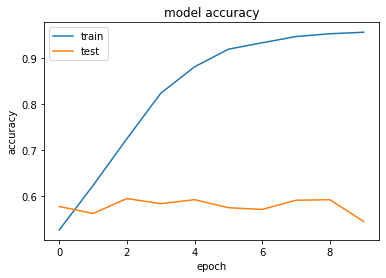

In [17]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#Saved The Model
model.save_pretrained("/tmp/sentiment_custom_model")

# **5. Load saved Model and do the prediction**

In [19]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("/tmp/sentiment_custom_model")

Some weights of the model checkpoint at /tmp/sentiment_custom_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /tmp/sentiment_custom_model and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
test_sentence = "jokowi bajingan" #ini gw dapat dari twitter ya ges ehehehe
# replace to test_sentence variable, if you want to test the model
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]
print(tf_output)

[[-3.9172642  1.4681543  1.8514315]]


In [21]:
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]
print(tf_prediction)

# 4.1463685e-05 = 0.00004146368
# 2.1356659e-04 = 0.00000333065
# 9.9995518e-01 = 0.99995518
# => sentiment = 2 (negative)
# nb : 0 = neutral , 1 = positive , 2 = negative

[0.00185418 0.40458518 0.5935607 ]
